## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [22]:
x = np.linspace(0, 20, 21)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [23]:
y = []
for x_value in x:
    y.append(-2 * x_value + 1)
y = np.array(y)
y

array([  1.,  -1.,  -3.,  -5.,  -7.,  -9., -11., -13., -15., -17., -19.,
       -21., -23., -25., -27., -29., -31., -33., -35., -37., -39.])

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def Batch_Linear_Regression(inputs, outputs, learning_rate):
    
    x0 = np.ones(len(inputs))
    theta_0 = 0
    theta_1 = 0
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:

        #Hypothesis Function
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)
        
        #Loss Function
        J = (1/(2 * len(inputs))) * (norm(h-outputs)**2)
        Loss_Function.append(J)

        #Gradiants
        DeltaJ_theta_0 = (1 / len(inputs)) * ((h - outputs) @ x0)
        DeltaJ_theta_1 = (1 / len(inputs)) * ((h - outputs) @ inputs)

        #New Thetas
        theta_0 = theta_0 - (learning_rate * DeltaJ_theta_0)
        theta_1 = theta_1 - (learning_rate * DeltaJ_theta_1)

        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

#### Try your function with any input parameterss of your choice.

In [5]:
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Batch_Linear_Regression(x, y, 0.01)

#### Calculate r2 score

In [6]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9962637359819491
Theta 1 = -1.9997260799600696
R2 Score = 0.9999999743198611


#### Plot loss vs. epochs

In [7]:
epochs = list(range(1, len(Loss_Function)+1))

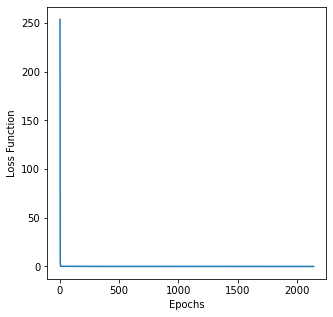

In [8]:
plt.figure(figsize=(5, 5));
plt.xlabel('Epochs');
plt.ylabel('Loss Function');
plt.plot(epochs, Loss_Function);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

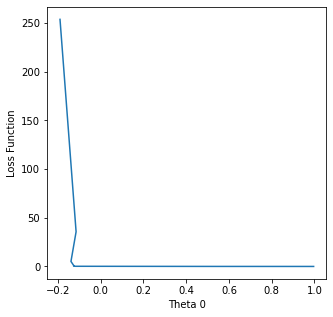

In [9]:
#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.plot(thetas_0, Loss_Function);

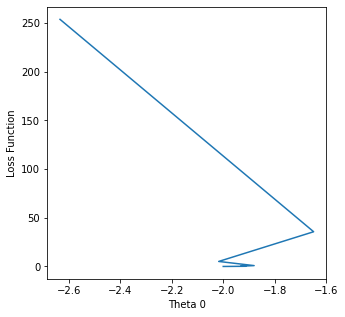

In [10]:
#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.plot(thetas_1, Loss_Function);

#### Plot all regression lines till converge

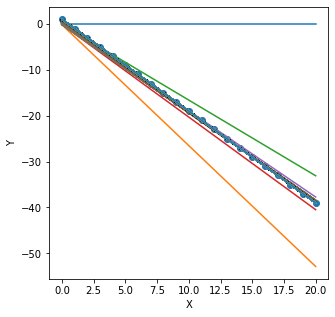

In [11]:
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
for i in hs:
    plt.plot(x, i)

#### Plot the best regression line

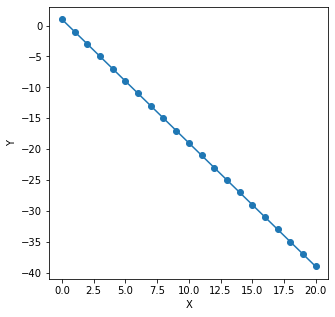

In [12]:
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.plot(x, h);

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [13]:
#Trial 1

theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Batch_Linear_Regression(x, y, 0.001)

In [14]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9962539929396548
Theta 1 = -1.9997253656597627
R2 Score = 0.9999999743096359


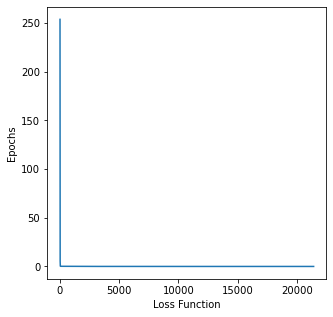

In [15]:
epochs = list(range(1, len(Loss_Function)+1))

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Loss Function');
plt.ylabel('Epochs');
plt.plot(epochs, Loss_Function);

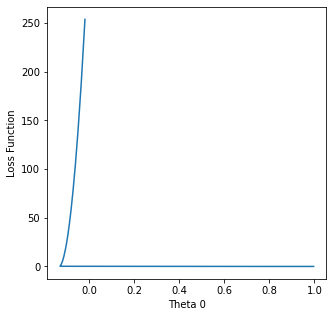

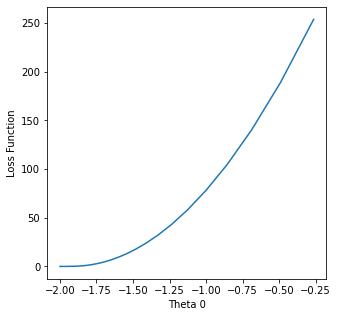

In [16]:
#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.plot(thetas_1, Loss_Function);

In [17]:
#Trial 2

theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Batch_Linear_Regression(x, y, 0.005)

In [18]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9962594309036857
Theta 1 = -1.9997257643380462
R2 Score = 0.999999974329383


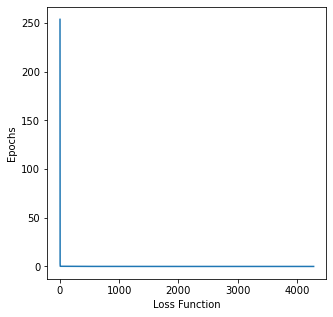

In [19]:
epochs = list(range(1, len(Loss_Function)+1))

#Loss Function VS Epochs
plt.figure(figsize=(5, 5));
plt.xlabel('Loss Function');
plt.ylabel('Epochs');
plt.plot(epochs, Loss_Function);

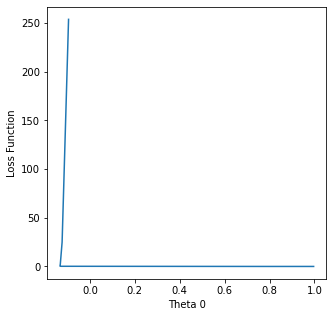

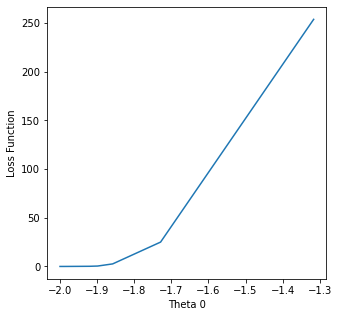

In [20]:
#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.plot(thetas_0, Loss_Function);

#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.plot(thetas_1, Loss_Function);

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [57]:
def Mini_Batch_Linear_Regression(inputs, outputs, learning_rate, batch_size):
    
    x0 = np.ones(len(inputs))
    theta_0 = 0
    theta_1 = 0
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:
    
        start = 0
        while True:
            
            #Batching Condition
            if start + batch_size < len(inputs):
                end = start + batch_size
            else:
                end = len(inputs)

            #Hypothesis Function
            h = (np.array([x0[start:end], inputs[start:end]]).T) @ (np.array([theta_0, theta_1]).T)
            
            #Loss Function
            J = (1/(2*batch_size)) * (norm(h-outputs[start:end])**2)
            Loss_Function.append(J)

            #Gradiants
            DeltaJ_theta_0 = (1/batch_size) * ((h - outputs[start:end]) @ x0[start:end])
            DeltaJ_theta_1 = (1/batch_size) * ((h - outputs[start:end]) @ inputs[start:end])

            #New Thetas
            theta_0 = theta_0 - (learning_rate * DeltaJ_theta_0)
            theta_1 = theta_1 - (learning_rate * DeltaJ_theta_1)
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            
            if end == len(inputs):
                 break
            else:
                start = end
        
        #After Each Epoch
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)
        #Loss_Function.append(J)
        #thetas_0.append(theta_0)
        #thetas_1.append(theta_1)

        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

In [58]:
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Mini_Batch_Linear_Regression(x, y, 0.01, 3)

In [59]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9997782966423796
Theta 1 = -1.9999955841645285
R2 Score = 0.9999999997801998


#### Plot loss vs. epochs

In [60]:
iterations = list(range(1, len(Loss_Function)+1))

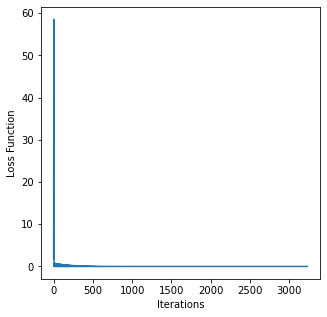

In [61]:
plt.figure(figsize=(5, 5));
plt.xlabel('Iterations');
plt.ylabel('Loss Function');
plt.plot(iterations, Loss_Function);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

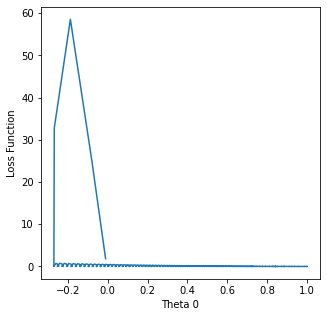

In [62]:
#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.plot(thetas_0, Loss_Function);

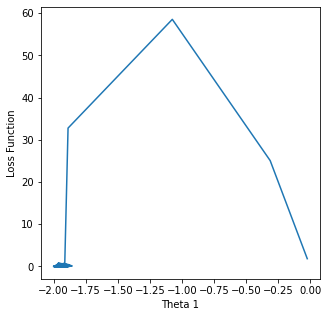

In [56]:
#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.plot(thetas_1, Loss_Function);

#### Plot all regression lines till converge

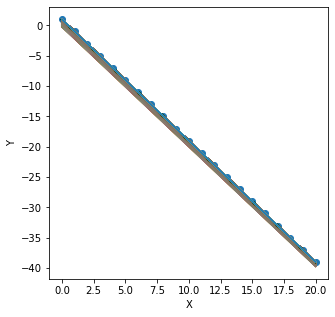

In [14]:
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
for i in hs:
    plt.plot(x, i)

#### Plot the best regression line

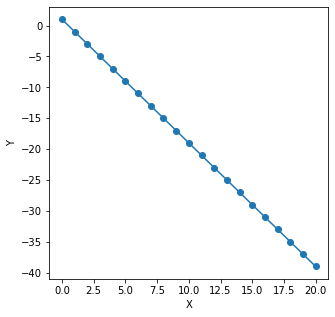

In [15]:
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.plot(x, h);

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [31]:
def Stochastic_Linear_Regression(inputs, outputs, learning_rate):
    
    x0 = np.ones(len(inputs))
    theta_0 = 0
    theta_1 = 0
    DeltaJ_theta_0 = 1
    DeltaJ_theta_1 = 1
    batch_size = 1
    
    Loss_Function = []
    thetas_0 = []
    thetas_1 = []
    hs = []
    
    while abs(DeltaJ_theta_0) > 0.001 or abs(DeltaJ_theta_1) > 0.001:
        
        start = 0
        while True:
            
            #Batching Condition
            if start + batch_size < len(inputs):
                end = start + batch_size
            else:
                end = len(inputs)

            #Hypothesis Function
            h = (np.array([x0[start:end], inputs[start:end]]).T) @ (np.array([theta_0, theta_1]).T)

            #Loss Function
            J = (1/(2*batch_size)) * (norm(h-outputs[start:end])**2)
            Loss_Function.append(J)

            #Gradiants
            DeltaJ_theta_0 = (1/batch_size) * ((h - outputs[start:end]) @ x0[start:end])
            DeltaJ_theta_1 = (1/batch_size) * ((h - outputs[start:end]) @ inputs[start:end])

            #New Thetas
            theta_0 = theta_0 - (learning_rate * DeltaJ_theta_0)
            theta_1 = theta_1 - (learning_rate * DeltaJ_theta_1)
            thetas_0.append(theta_0)
            thetas_1.append(theta_1)
            
            if end == len(inputs):
                 break
            else:
                start = end
        
        #After Each Epoch
        h = (np.array([x0, inputs]).T) @ (np.array([theta_0, theta_1]).T)
        hs.append(h)
        #Loss_Function.append(J)
        #thetas_0.append(theta_0)
        #thetas_1.append(theta_1)

        
    return theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs

In [39]:
theta_0, theta_1, Loss_Function, thetas_0, thetas_1, h, hs = Stochastic_Linear_Regression(x, y, 0.01)

In [40]:
#Results
print(f'Theta 0 = {theta_0}')
print(f'Theta 1 = {theta_1}')

r2 = r2_score(h , y)
print(f'R2 Score = {r2}')

Theta 0 = 0.9944202289204126
Theta 1 = -1.999728456495572
R2 Score = 0.999999925606598


#### Plot loss vs. epochs

In [19]:
iterations = list(range(1, len(Loss_Function)+1))

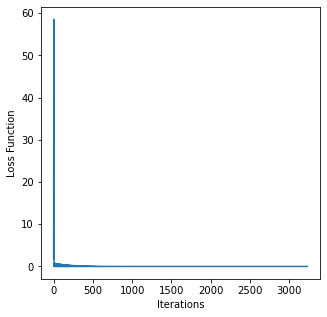

In [28]:
plt.figure(figsize=(5, 5));
plt.xlabel('Iterations');
plt.ylabel('Loss Function');
plt.plot(epochs, Loss_Function);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

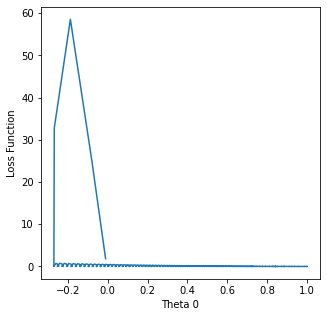

In [29]:
#Loss Function VS Theta 0
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 0');
plt.ylabel('Loss Function');
plt.plot(thetas_0, Loss_Function);

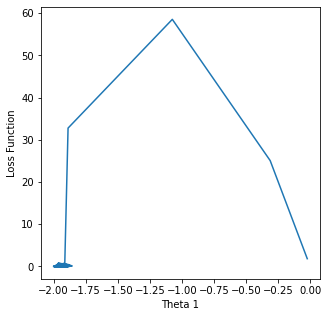

In [30]:
#Loss Function VS Theta 1
plt.figure(figsize=(5, 5));
plt.xlabel('Theta 1');
plt.ylabel('Loss Function');
plt.plot(thetas_1, Loss_Function);

#### Plot all regression lines till converge

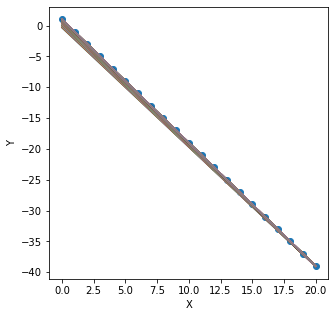

In [37]:
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
for i in hs:
    plt.plot(x, i)

#### Plot the best regression line

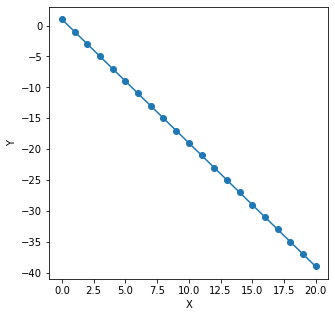

In [38]:
plt.figure(figsize=(5, 5));
plt.scatter(x,y)
plt.xlabel('X');
plt.ylabel('Y');
plt.plot(x, h);